In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
orders = pd.read_csv('./datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('./datasets/products.csv', sep=';')
aisles = pd.read_csv('./datasets/aisles.csv', sep=';')
departments = pd.read_csv('./datasets/departments.csv', sep=';')
order_products = pd.read_csv('./datasets/order_products.csv', sep=';')

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
# Check for duplicated orders
orders[orders.duplicated]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [6]:
# Check for all orders placed Wednesday at 2:00 AM
orders.loc[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [7]:
# Remove duplicate orders
orders.drop_duplicates(inplace=True)

In [8]:
# Double check for duplicate rows
orders[orders.duplicated].shape[0]

0

In [9]:
# Double check for duplicate order IDs only
orders[orders.duplicated(subset='order_id')].shape[0]

0

### `products` data frame

In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
# Check for fully duplicate rows
products[products.duplicated]

,product_id,product_name,aisle_id,department_id


In [12]:
# Check for just duplicate product IDs
products[products.duplicated(subset='product_id')]

,product_id,product_name,aisle_id,department_id


In [13]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products[products['product_name'].str.upper().duplicated()]

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [14]:
# Check for duplicate product names that aren't missing
products[(products['product_name'].isna() == False) & (products['product_name'].str.upper().duplicated())]

,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [15]:
# Some products have the same product_name but if we look at product_id, all products are different
products[products.duplicated(subset='product_id')].shape[0]

0

### `departments` data frame

In [16]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [17]:
# Departments data frame has only 21 entries so we might as well print 'em all
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [18]:
departments[departments.duplicated]

,department_id,department


There are no duplicated or missing data here. The only interesting thing is that department 21 is named 'missing'

In [19]:
# Since departments is a DataFrame with only 2 columns, we can index it by id and make into Series to make working with it faster
departments = departments.set_index('department_id').squeeze()
departments.info()

<class 'pandas.core.series.Series'>
Int64Index: 21 entries, 1 to 21
Series name: department
Non-Null Count  Dtype 
--------------  ----- 
21 non-null     object
dtypes: object(1)
memory usage: 336.0+ bytes


### `aisles` data frame


In [20]:
aisles.info()
aisles.sample(5, random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
42,43,buns rolls
36,37,ice cream ice
93,94,tea
5,6,other
65,66,asian foods


In [21]:
aisles.duplicated(subset='aisle_id').sum()

0

In [22]:
# Since aisles is a data frame with only 2 coluns one of which is id we can make into a series with an id index
aisles = aisles.set_index('aisle_id').squeeze()
aisles.info()

<class 'pandas.core.series.Series'>
Int64Index: 134 entries, 1 to 134
Series name: aisle
Non-Null Count  Dtype 
--------------  ----- 
134 non-null    object
dtypes: object(1)
memory usage: 2.1+ KB


### `order_products` data frame

In [23]:
order_products.info(null_counts=True)
order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


/var/folders/jp/1n4xl2n16154nvh9rxfyrbmc6r6mlp/T/ipykernel_5798/582085705.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  order_products.info(null_counts=True)


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [24]:
order_products.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


/var/folders/jp/1n4xl2n16154nvh9rxfyrbmc6r6mlp/T/ipykernel_5798/1849786742.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  order_products.info(null_counts=True)


## Find and remove missing values


### `products` data frame


In [25]:
# Are all of the missing product names associated with aisle ID 100?
products_product_name_na = products[products['product_name'].isna()]
print(f'We have a total of {products_product_name_na.shape[0]} missing product names')
products_product_name_na_aisle_100 = products_product_name_na.query('aisle_id == 100')
print(f'Of those {products_product_name_na_aisle_100.shape[0]} are associated with aisle 100')
products_product_name_na_aisle_100['department_id'].value_counts()


We have a total of 1258 missing product names
Of those 1258 are associated with aisle 100


21    1258
Name: department_id, dtype: int64

All products with missing name are in aisle ID 100 in a department with ID 21.

In [26]:
# What is this ailse and department?
print(f"Aisle 100 is {aisles.loc[100]}")
print(f"Department 21 is {departments.loc[21]}")

Aisle 100 is missing
Department 21 is missing


So all of the products with missing names are for some reason in a missing department and in a missing aisle.

In [27]:
# Fill missing product names with 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)
print(f"We now have {products['product_name'].isna().sum()} products with missing name")

We now have 0 products with missing name


### `orders` data frame


We saw in info call above that the only missing values inside orders DataFrame are in days_since_prior_order column.

It's also the only float64 column. Let's check if missing values here correspond to no previous orders and try to convert the column to int64 without losing data.

In [28]:
orders_days_since_prior_order_na = orders[orders['days_since_prior_order'].isna()]
orders_days_since_prior_order_na['order_number'].value_counts()

1    28817
Name: order_number, dtype: int64

We can see that all na values are in orders with no previous orders. That seems to be logical and should not interfere with our analysis as Pandas excludes NaN values from calculations by default.

We also might've wanted to convert this column from float to int but due to NaN implementation in pandas and python it's not possible to do that. Any int column containing NaN values will be converted to float64.

### `order_products` data frame

In [29]:
# What are the min and max values in this column?
print('Max values\n\n', order_products.max(), sep='')
print('\nMin values\n', order_products.min(), sep='')

Max values

order_id             3421079.0
product_id             49694.0
add_to_cart_order         64.0
reordered                  1.0
dtype: float64

Min values
order_id             4.0
product_id           1.0
add_to_cart_order    1.0
reordered            0.0
dtype: float64


In [30]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
add_to_card_order_na = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

In [31]:
# Do all orders with missing values have more than 64 products?
order_products.query('order_id in @add_to_card_order_na')['order_id'].value_counts().min()

65

Yes, all orders with missing values have more than 64 products. I guess in original dataset the type of data was used which prevented counting more than 64 products in one order.

In [32]:
# Replace missing values with 999 and convert column to integer type

order_products['add_to_cart_order'].fillna(999, inplace=True)

np.array_equal(order_products['add_to_cart_order'], order_products['add_to_cart_order'].astype(int))

True

In [33]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
order_products.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


/var/folders/jp/1n4xl2n16154nvh9rxfyrbmc6r6mlp/T/ipykernel_5798/3510040024.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  order_products.info(null_counts=True)


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [34]:
print(f"Min hour of day is {orders['order_hour_of_day'].min()}") 
print(f"Max hour of day is {orders['order_hour_of_day'].max()}") 

Min hour of day is 0
Max hour of day is 23


In [35]:
print(f"Min day of week is {orders['order_dow'].min()}")
print(f"Max day of week is {orders['order_dow'].max()}")

Min day of week is 0
Max day of week is 6


This values make sense

### [A2] What time of day do people shop for groceries?

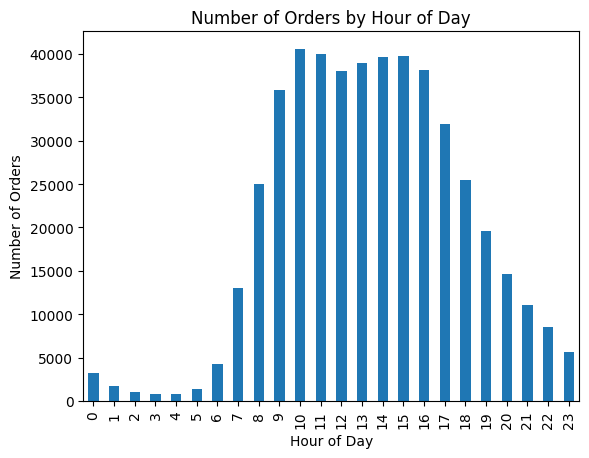

In [36]:
orders_by_hour_of_day = orders['order_hour_of_day'].value_counts().sort_index()
orders_by_hour_of_day.plot(kind='bar', title='Number of Orders by Hour of Day', ylabel='Number of Orders', xlabel='Hour of Day')
plt.show()

### [A3] What day of the week do people shop for groceries?

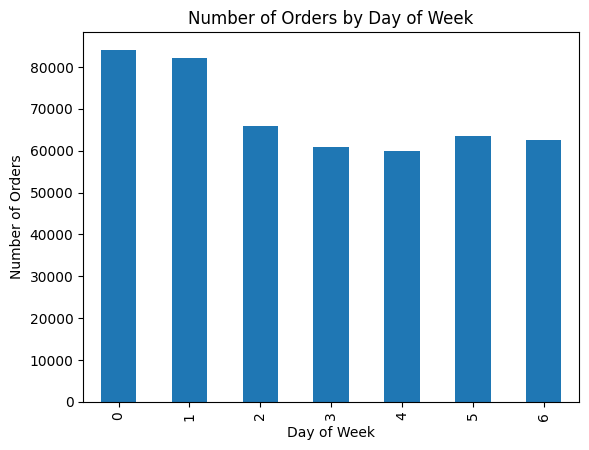

In [37]:
orders_by_day_of_week = orders['order_dow'].value_counts().sort_index()
orders_by_day_of_week.plot(kind='bar', title='Number of Orders by Day of Week', ylabel='Number of Orders', xlabel='Day of Week')
plt.show()

### [A4] How long do people wait until placing another order?


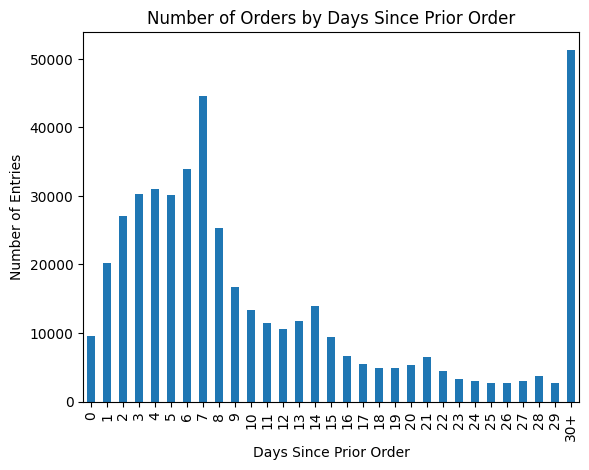

In [38]:
orders_since_prior_order = orders['days_since_prior_order'].value_counts().sort_index()

orders_since_prior_order_plot = orders_since_prior_order.plot(
    kind='bar',
    title='Number of Orders by Days Since Prior Order',
    ylabel='Number of Entries',
    xlabel='Days Since Prior Order'
)

orders_since_prior_order_xticks = orders_since_prior_order.index.values
orders_since_prior_order_xticks.sort()

orders_since_prior_order_xtickslabels: list = orders_since_prior_order_xticks.astype(int)[:-1].tolist()
orders_since_prior_order_xtickslabels.append('30+')

orders_since_prior_order_plot.set_xticklabels(orders_since_prior_order_xtickslabels)
plt.show()

Looks like people order the most after 7 days of waiting. We also see even bigger spike on the 30th day, but that's due to the fact that we don't have values for more than 30 days in a dataset. So what this bar really says is that this is the number of orders people did after 30+ days.

# [B] Medium (must complete all to pass)


### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

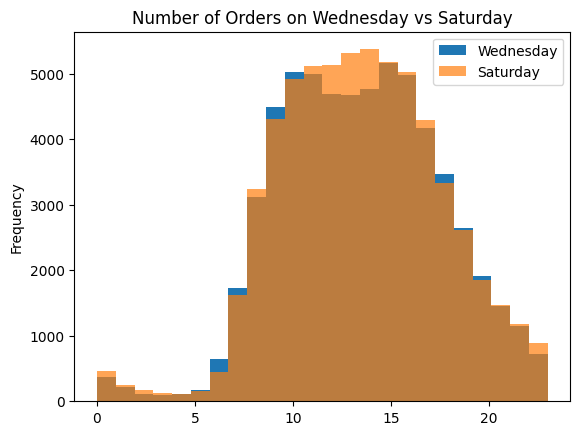

In [39]:
wednesday_orders = orders.loc[(orders['order_dow'] == 3)]
wednesday_orders['order_hour_of_day'].plot(kind='hist', title='Number of Orders on Wednesday vs Saturday', bins=24)

saturday_orders = orders.loc[(orders['order_dow'] == 6)]

saturday_orders['order_hour_of_day'].plot(kind='hist', bins=24, alpha=0.7)

plt.legend(['Wednesday', 'Saturday'])
plt.show()

On Saturday people work less so they order a bit more during the day. Or maybe they don'r oder on Instacart and go eat somewhere else

### [B2] What's the distribution for the number of orders per customer?

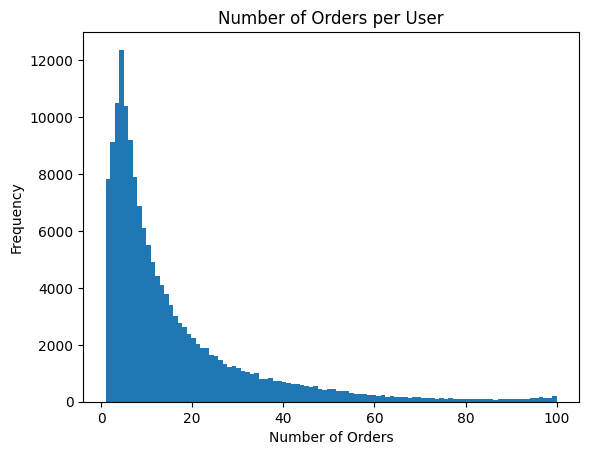

In [40]:
# only leave max order_number for each user_id
number_of_orders_per_user = orders.groupby('user_id')['order_number'].max()
number_of_orders_per_user.plot(kind='hist', title='Number of Orders per User', bins=100)
plt.xlabel('Number of Orders')
plt.show()

Most Users have ordered 4 times. There are some users who have ordered more than 100 times. (the data we have doesn't have values for more than 100 orders)

### [B3] What are the top 20 popular products (display their id and name)?

In [41]:
top_20_product_ids = order_products.groupby(by='product_id')['order_id'].count().sort_values(ascending=False).head(20).to_frame()
top_20_product_ids.rename(columns={'order_id': 'number_of_orders'}, inplace=True)

top_20_product_ids.merge(products, on='product_id', how='left')[['product_id', 'product_name', 'number_of_orders']]

,product_id,product_name,number_of_orders
0,24852,Banana,66050
1,13176,Bag of Organic Bananas,53297
2,21137,Organic Strawberries,37039
3,21903,Organic Baby Spinach,33971
4,47209,Organic Hass Avocado,29773
5,47766,Organic Avocado,24689
6,47626,Large Lemon,21495
7,16797,Strawberries,20018
8,26209,Limes,19690
9,27845,Organic Whole Milk,19600


# [C] Hard (must complete at least two to pass)


### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [57]:
products_in_one_order = order_products.groupby('order_id')['product_id'].count().value_counts().sort_index()

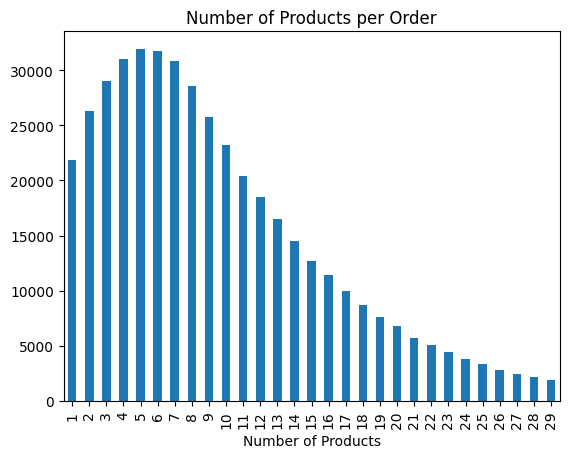

In [53]:
products_in_one_order[products_in_one_order.index < 30].plot(kind='bar', title='Number of Products per Order')
plt.xlabel('Number of Products')
plt.show()

People usually get around 4 to 6 items

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?


In [44]:
most_frequent_reorders = order_products.groupby('product_id')['reordered'].sum().sort_values(ascending=False).head(20).to_frame()

most_frequent_reorders.rename(columns={'reordered': 'number_of_reorders'}, inplace=True)
top20_reorders = most_frequent_reorders.merge(products[['product_name', 'product_id']], on='product_id', how='left')

top20_reorders

,product_id,number_of_reorders,product_name
0,24852,55763,Banana
1,13176,44450,Bag of Organic Bananas
2,21137,28639,Organic Strawberries
3,21903,26233,Organic Baby Spinach
4,47209,23629,Organic Hass Avocado
5,47766,18743,Organic Avocado
6,27845,16251,Organic Whole Milk
7,47626,15044,Large Lemon
8,27966,14748,Organic Raspberries
9,16797,13945,Strawberries


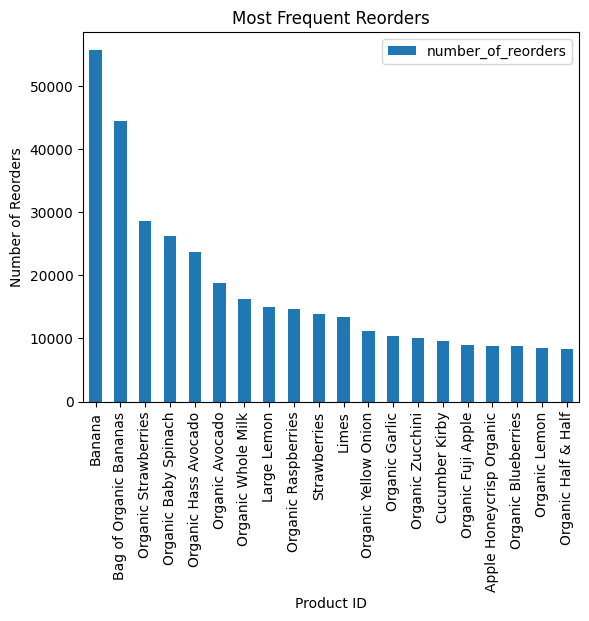

In [45]:
top20_reorders.plot(kind='bar', x='product_name', y='number_of_reorders', title='Most Frequent Reorders', ylabel='Number of Reorders', xlabel='Product ID')
plt.show()

### [C3] For each product, what proportion of its orders are reorders?

In [69]:
product_id_reordered = order_products.groupby('product_id')
reorder_rate = product_id_reordered['reordered'].sum() / product_id_reordered['reordered'].count()
product_reorder_rate = reorder_rate.to_frame().merge(products[['product_name', 'product_id']], on='product_id', how='left')

product_reorder_rate

,product_id,reordered,product_name
0,1,0.564286,Chocolate Sandwich Cookies
1,2,0.000000,All-Seasons Salt
2,3,0.738095,Robust Golden Unsweetened Oolong Tea
3,4,0.510204,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,7,0.500000,Pure Coconut Water With Orange
...,...,...,...
45568,49690,0.800000,HIGH PERFORMANCE ENERGY DRINK
45569,49691,0.430556,ORIGINAL PANCAKE & WAFFLE MIX
45570,49692,0.416667,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
45571,49693,0.440000,SPRING WATER BODY WASH


Most of the items are never reordered. There a lot of items which are reordered half of the time. And it seems that for some items we have only reorders - may be we don't have a whole data to see when those items were ordered first.

### [C4] For each customer, what proportion of their products ordered are reorders?

In [70]:
customer_id_reordered = orders.merge(order_products, on='order_id', how='left')

customer_id_reordered = customer_id_reordered.groupby('user_id')
customer_id_reordered['reordered'].mean()

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 157437, dtype: float64

### [C5] What are the top 20 items that people put in their carts first? 

In [48]:

add_to_card_products = order_products.groupby('product_id')['add_to_cart_order']

# count only values that are equal to 1
add_to_card_products = add_to_card_products.apply(lambda x: (x == 1).sum())


In [49]:
add_to_card_products = add_to_card_products.sort_values(ascending=False).head(20).to_frame()

add_to_card_products.rename(columns={'add_to_cart_order': 'number_of_first_orders'}, inplace=True)

add_to_card_products.merge(products[['product_name', 'product_id']], on='product_id', how='left')

,product_id,number_of_first_orders,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries
